In [3]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9DV/data.csv')
data.head()

,Species,Weight,Length,Diagonal,Height,Width
0,A,242.0,25.4,30.0,11.5200,4.0200
1,A,290.0,26.3,31.2,12.4800,4.3056
2,A,340.0,26.5,31.1,12.3778,4.6961
3,A,363.0,29.0,33.5,12.7300,4.4555
4,A,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# 품종확인하기
pd.unique(data['Species'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [8]:
import numpy as np
y = data['Species'].to_numpy()
y

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G'], dtype=object)

In [20]:
x = data.iloc[:,1:].to_numpy()
x[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
x_train_scaled =  ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

In [60]:
# k 최근접 이웃의 다중 분류
from sklearn.neighbors import KNeighborsClassifier
kn =  KNeighborsClassifier()
kn.fit(x_train_scaled,y_train)
kn.score(x_train_scaled, y_train), kn.score(x_test_scaled, y_test)

(0.8151260504201681, 0.85)

In [61]:
kn.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [62]:
kn.predict(x_test_scaled[:5])

array(['E', 'G', 'F', 'E', 'E'], dtype=object)

In [63]:
y_test[:5]

array(['E', 'G', 'F', 'C', 'E'], dtype=object)

In [64]:
kn.predict_proba(x_test_scaled[:5])

array([[0. , 0.4, 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0.8],
       [0. , 0. , 0. , 0. , 0.4, 0.6, 0. ],
       [0. , 0.2, 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0.8, 0. , 0. ]])

In [65]:
distance, index = kn.kneighbors(x_test_scaled[3:4])

In [66]:
y_train[index]

array([['E', 'B', 'E', 'E', 'E']], dtype=object)

In [67]:
# 로지스틱 회귀(이름은 회귀지만 분류알고리즘)
# z = ax무게 + bx길이 + cx대각선 + dx높이 + ex두께 + ㄹ

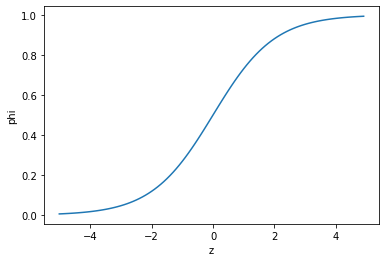

In [68]:
# 시그모이드, 로지스틱 함수  값이 0과 1사이를 가지게 함
# 1/ 1+E(-z)
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1+ np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [72]:
# 로지스틱회귀(이진분류)
A_B_indexes =  (y_train =='A') | (y_train=='B')
x_train_scaled_A_B =  x_train_scaled[A_B_indexes]
y_train_scaled_A_B = y_train[A_B_indexes]
x_train_scaled_A_B.shape, y_train_scaled_A_B.shape

((41, 5), (41,))

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled_A_B, y_train_scaled_A_B)

LogisticRegression()

In [73]:
lr.predict(x_train_scaled_A_B[:5])

array(['A', 'B', 'A', 'A', 'A'], dtype=object)

In [74]:
lr.predict_proba(x_train_scaled_A_B[:5])

array([[0.99147592, 0.00852408],
       [0.01667463, 0.98332537],
       [0.98198018, 0.01801982],
       [0.94494806, 0.05505194],
       [0.99247108, 0.00752892]])

In [75]:
lr.coef_, lr.intercept_

(array([[-0.59065741, -0.36852835, -0.61523891, -2.08924701, -0.18971122]]),
 array([0.56912639]))

In [77]:
# z값을 계산
decisions = lr.decision_function(x_train_scaled_A_B[:5])
decisions

array([-4.75629992,  4.07705167, -3.9980986 , -2.84285293, -4.88144672])

In [78]:
# z값을 시그모이드 함수에 통과시면 확률을 얻을수 있다
# scipy라이브러리에 시그모이드 함수가 존재
from scipy.special import expit
expit(decisions)

array([0.00852408, 0.98332537, 0.01801982, 0.05505194, 0.00752892])

In [92]:
#다중분류
# LogisticRegression 반복학습  maxiter
# 릿지회귀처럼 계수의 제곱을 규제하는 알고리즘  L2규제  C
# 릿지에서는 규제가 alpha고 클수록 강도가 세지  C는 작을수록 강도가 세짐
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(x_train_scaled, y_train)
lr.score(x_train_scaled, y_train), lr.score(x_test_scaled, y_test)


(0.9327731092436975, 0.925)

In [93]:
lr.predict(x_test_scaled[:5])

array(['E', 'G', 'F', 'B', 'E'], dtype=object)

In [94]:
proba = lr.predict_proba(x_test_scaled[:5])
np.round(proba,decimals=3)

array([[0.   , 0.178, 0.004, 0.013, 0.802, 0.   , 0.003],
       [0.   , 0.054, 0.   , 0.021, 0.148, 0.   , 0.777],
       [0.   , 0.021, 0.   , 0.   , 0.049, 0.919, 0.01 ],
       [0.005, 0.516, 0.061, 0.012, 0.4  , 0.007, 0.   ],
       [0.   , 0.115, 0.002, 0.   , 0.879, 0.002, 0.001]])

In [95]:
lr.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [97]:
lr.coef_.shape, lr.intercept_.shape

((7, 5), (7,))

In [99]:
decision = lr.decision_function(x_test_scaled[:5])
np.round(decision,decimals=2)

array([[-6.06,  3.58, -0.16,  0.96,  5.09, -2.93, -0.47],
       [-9.64,  3.33, -3.25,  2.36,  4.33, -3.13,  5.99],
       [-4.06,  2.48, -3.44, -6.27,  3.31,  6.24,  1.73],
       [-1.22,  3.45,  1.31, -0.3 ,  3.2 , -0.88, -5.57],
       [-5.95,  3.66, -0.32, -1.98,  5.7 , -0.3 , -0.8 ]])

In [102]:
from scipy.special import softmax
proba = softmax(decision,axis=1)
np.round(proba,decimals=2)

array([[0.  , 0.18, 0.  , 0.01, 0.8 , 0.  , 0.  ],
       [0.  , 0.05, 0.  , 0.02, 0.15, 0.  , 0.78],
       [0.  , 0.02, 0.  , 0.  , 0.05, 0.92, 0.01],
       [0.  , 0.52, 0.06, 0.01, 0.4 , 0.01, 0.  ],
       [0.  , 0.11, 0.  , 0.  , 0.88, 0.  , 0.  ]])

In [103]:
# 경사하강법
# 확률적 경사하강법, 미니배치 경사하강법, 배치경사 하강법
# 손실함수 : 로지스틱 손실함수

In [107]:
# 데이터 섞기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=42)

In [108]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
x_train_scaled =  ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

In [135]:
# 확률적 경사하강법 분류
from sklearn.linear_model import SGDClassifier

In [137]:
sc =  SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique( y_train)

In [138]:
# 확률적 경사하강법사용한 모델은 에포크횟수에 땨라서 과대적합이 일어날수있다.
for i in range(300):    
    # 훈련할때마다 1에포크씩 이어서 훈련
    sc.partial_fit(x_train_scaled,y_train,classes=classes)
    train_score.append(sc.score(x_train_scaled,y_train))
    test_score.append(sc.score(x_test_scaled,y_test))

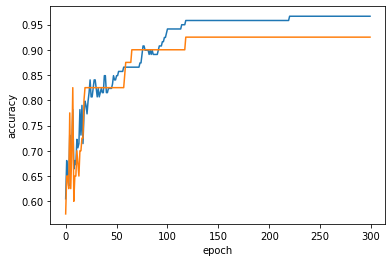

In [139]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [141]:
sc =  SGDClassifier(loss='log_loss', tol=None, max_iter=150,random_state=42)
sc.fit(x_train_scaled,y_train)
sc.score(x_train_scaled,y_train), sc.score(x_test_scaled,y_test)


(0.957983193277311, 0.9)

In [142]:
# 서포트백터 머신 알고리즘에서 사용하는 로스 함수 hinge(힌지)
sc =  SGDClassifier(loss='hinge', tol=None, max_iter=150,random_state=42)
sc.fit(x_train_scaled,y_train)
sc.score(x_train_scaled,y_train), sc.score(x_test_scaled,y_test)


(0.9327731092436975, 0.9)

In [143]:
# 결정 트리
wine = pd.read_csv("https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9DV/wine.csv")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [144]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [145]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [160]:
wine.shape

(6497, 4)

In [161]:
x = wine.iloc[:,:-1].to_numpy()
y = wine.iloc[:,-1].to_numpy()
x.shape, y.shape
# type(x), type(y)

((6497, 3), (6497,))

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [163]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled =  ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

In [164]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_train_scaled,y_train), lr.score(x_test_scaled, y_test)

(0.7859195402298851, 0.7667692307692308)

In [171]:
sc =  SGDClassifier(loss='log_loss', tol=None, max_iter=100,random_state=42)
sc.fit(x_train_scaled,y_train)
sc.score(x_train_scaled,y_train), sc.score(x_test_scaled, y_test)

(0.7822249589490968, 0.7618461538461538)